In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Import Data

source: http://www.bom.gov.au/climate/data/

In [3]:
df = pd.read_csv("data/daily_min_temp.csv", parse_dates=["Date"], index_col="Date")
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


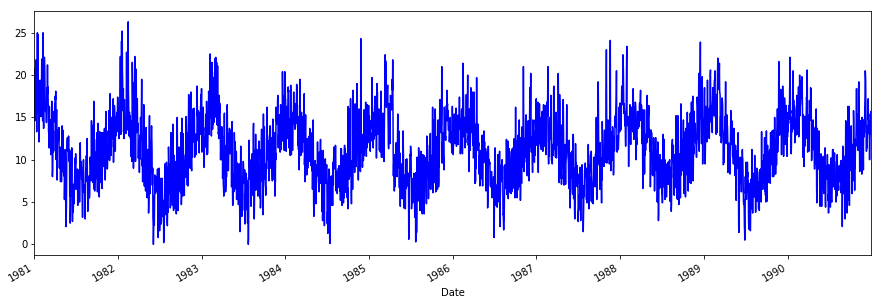

In [4]:
df.Temp.plot(figsize=(15, 5), color='b')

# Dataset Splitting

In [5]:
ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)
ts_train.shape, ts_test.shape

((2920, 1), (730, 1))

# Prepare Sequence

In [6]:
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader

In [7]:
seq_len = 14
bs = 32

train_set = TimeSeriesDataset(ts_train, "Temp", seq_len)
trainloader = DataLoader(train_set, batch_size=bs)

test_set = TimeSeriesDataset(ts_test, "Temp", seq_len)
testloader = DataLoader(test_set, batch_size=bs)

(N, S, F): (208, 14, 1)
Note: last 7 data excluded

(N, S, F): (52, 14, 1)
Note: last 1 data excluded



# Arsitektur & Config

In [8]:
class LSTM(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers, dropout):
        super().__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden

In [9]:
config = set_config({
    "input_size": train_set.n_feature,
    "seq_len": train_set.n_seq,
    "output_size": 1,
    "hidden_size": 64,
    "num_layers": 2,
    "dropout": 0
})

# Training Preparation -> MCOC

In [10]:
model = LSTM(config.input_size, config.output_size, config.hidden_size, config.num_layers, config.dropout).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model/lstm')

# Training


Epoch     1
Train_cost  = 134.5614 | Test_cost  = 136.4317 | 

Epoch     2
Train_cost  = 122.4530 | Test_cost  = 119.1693 | 

Epoch     3
Train_cost  = 103.3461 | Test_cost  = 97.6056 | 

Epoch     4
Train_cost  = 83.4141 | Test_cost  = 79.2757 | 

Epoch     5
Train_cost  = 67.7823 | Test_cost  = 65.8015 | 

Epoch     6
Train_cost  = 56.4165 | Test_cost  = 55.8122 | 

Epoch     7
Train_cost  = 47.9930 | Test_cost  = 48.2374 | 

Epoch     8
Train_cost  = 41.5802 | Test_cost  = 42.3062 | 

Epoch     9
Train_cost  = 36.5528 | Test_cost  = 37.5573 | 

Epoch    10
Train_cost  = 32.5623 | Test_cost  = 33.7739 | 

Epoch    11
Train_cost  = 29.4055 | Test_cost  = 30.7135 | 

Epoch    12
Train_cost  = 26.8672 | Test_cost  = 28.2158 | 

Epoch    13
Train_cost  = 24.8221 | Test_cost  = 26.1802 | 

Epoch    14
Train_cost  = 23.1808 | Test_cost  = 24.5262 | 

Epoch    15
Train_cost  = 21.8702 | Test_cost  = 23.1862 | 

Epoch    16
Train_cost  = 20.8276 | Test_cost  = 22.0971 | 

Epoch    17
Train_

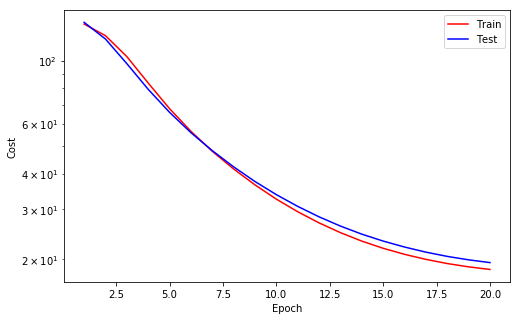


Epoch    21
Train_cost  = 18.1285 | Test_cost  = 19.1279 | 

Epoch    22
Train_cost  = 17.9020 | Test_cost  = 18.8551 | 

Epoch    23
Train_cost  = 17.7290 | Test_cost  = 18.6403 | 

Epoch    24
Train_cost  = 17.5961 | Test_cost  = 18.4703 | 

Epoch    25
Train_cost  = 17.4927 | Test_cost  = 18.3347 | 

Epoch    26
Train_cost  = 17.4112 | Test_cost  = 18.2257 | 

Epoch    27
Train_cost  = 17.3456 | Test_cost  = 18.1371 | 

Epoch    28
Train_cost  = 17.2918 | Test_cost  = 18.0643 | 

Epoch    29
Train_cost  = 17.2468 | Test_cost  = 18.0039 | 

Epoch    30
Train_cost  = 17.2083 | Test_cost  = 17.9532 | 

Epoch    31
Train_cost  = 17.1750 | Test_cost  = 17.9102 | 

Epoch    32
Train_cost  = 17.1457 | Test_cost  = 17.8733 | 

Epoch    33
Train_cost  = 17.1195 | Test_cost  = 17.8414 | 

Epoch    34
Train_cost  = 17.0959 | Test_cost  = 17.8135 | 

Epoch    35
Train_cost  = 17.0746 | Test_cost  = 17.7889 | 

Epoch    36
Train_cost  = 17.0550 | Test_cost  = 17.7670 | 

Epoch    37
Train_cost 

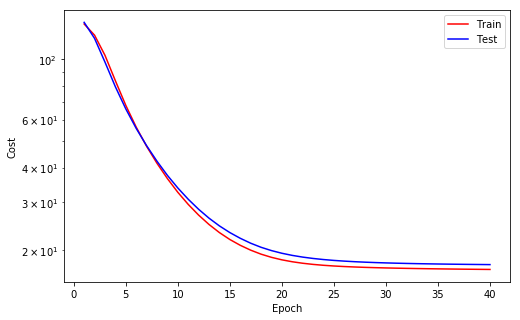


Epoch    41
Train_cost  = 16.9773 | Test_cost  = 17.6846 | 

Epoch    42
Train_cost  = 16.9647 | Test_cost  = 17.6717 | 

Epoch    43
Train_cost  = 16.9529 | Test_cost  = 17.6597 | 

Epoch    44
Train_cost  = 16.9416 | Test_cost  = 17.6484 | 

Epoch    45
Train_cost  = 16.9308 | Test_cost  = 17.6376 | 

Epoch    46
Train_cost  = 16.9202 | Test_cost  = 17.6270 | 

Epoch    47
Train_cost  = 16.9096 | Test_cost  = 17.6161 | 

Epoch    48
Train_cost  = 16.8964 | Test_cost  = 17.5983 | 

Epoch    49
Train_cost  = 16.8745 | Test_cost  = 17.5886 | 

Epoch    50
Train_cost  = 16.8630 | Test_cost  = 17.5732 | 

Epoch    51
Train_cost  = 16.8489 | Test_cost  = 17.5497 | 

Epoch    52
Train_cost  = 16.8340 | Test_cost  = 17.5336 | 

Epoch    53
Train_cost  = 16.8217 | Test_cost  = 17.5211 | 

Epoch    54
Train_cost  = 16.8105 | Test_cost  = 17.5087 | 

Epoch    55
Train_cost  = 16.7998 | Test_cost  = 17.4958 | 

Epoch    56
Train_cost  = 16.7892 | Test_cost  = 17.4841 | 

Epoch    57
Train_cost 

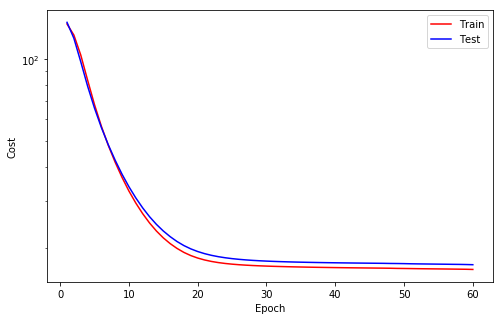


Epoch    61
Train_cost  = 16.7027 | Test_cost  = 17.3947 | 

Epoch    62
Train_cost  = 16.6855 | Test_cost  = 17.3717 | 

Epoch    63
Train_cost  = 16.6504 | Test_cost  = 17.3265 | 

Epoch    64
Train_cost  = 16.6069 | Test_cost  = 17.2797 | 

Epoch    65
Train_cost  = 16.5340 | Test_cost  = 17.1628 | 

Epoch    66
Train_cost  = 16.3710 | Test_cost  = 16.8794 | 

Epoch    67
Train_cost  = 16.0036 | Test_cost  = 16.3638 | 

Epoch    68
Train_cost  = 15.4197 | Test_cost  = 15.5035 | 

Epoch    69
Train_cost  = 14.3795 | Test_cost  = 13.9159 | 

Epoch    70
Train_cost  = 12.8997 | Test_cost  = 12.8000 | 

Epoch    71
Train_cost  = 12.0134 | Test_cost  = 11.9930 | 

Epoch    72
Train_cost  = 11.3889 | Test_cost  = 11.1641 | 

Epoch    73
Train_cost  = 10.6602 | Test_cost  = 10.5302 | 

Epoch    74
Train_cost  = 10.1761 | Test_cost  = 10.0423 | 

Epoch    75
Train_cost  = 9.7899 | Test_cost  = 9.5360 | 

Epoch    76
Train_cost  = 9.4174 | Test_cost  = 9.1380 | 

Epoch    77
Train_cost  = 9

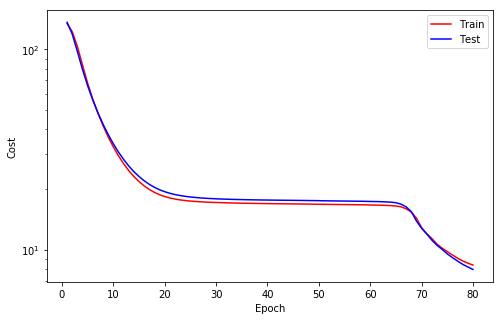


Epoch    81
Train_cost  = 8.2310 | Test_cost  = 7.7633 | 

Epoch    82
Train_cost  = 8.0821 | Test_cost  = 7.5696 | 

Epoch    83
Train_cost  = 7.9315 | Test_cost  = 7.4098 | 

Epoch    84
Train_cost  = 7.7976 | Test_cost  = 7.2720 | 

Epoch    85
Train_cost  = 7.6875 | Test_cost  = 7.1489 | 

Epoch    86
Train_cost  = 7.5971 | Test_cost  = 7.0379 | 

Epoch    87
Train_cost  = 7.5182 | Test_cost  = 6.9379 | 

Epoch    88
Train_cost  = 7.4463 | Test_cost  = 6.8456 | 

Epoch    89
Train_cost  = 7.3789 | Test_cost  = 6.7590 | 

Epoch    90
Train_cost  = 7.3148 | Test_cost  = 6.6787 | 

Epoch    91
Train_cost  = 7.2544 | Test_cost  = 6.6053 | 

Epoch    92
Train_cost  = 7.1988 | Test_cost  = 6.5389 | 

Epoch    93
Train_cost  = 7.1487 | Test_cost  = 6.4784 | 

Epoch    94
Train_cost  = 7.1037 | Test_cost  = 6.4231 | 

Epoch    95
Train_cost  = 7.0629 | Test_cost  = 6.3724 | 

Epoch    96
Train_cost  = 7.0253 | Test_cost  = 6.3257 | 

Epoch    97
Train_cost  = 6.9903 | Test_cost  = 6.2825 

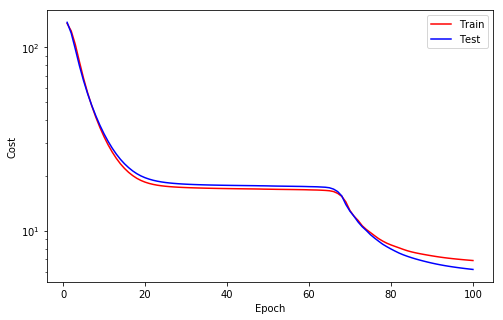


Epoch   101
Train_cost  = 6.8692 | Test_cost  = 6.1337 | 

Epoch   102
Train_cost  = 6.8425 | Test_cost  = 6.1008 | 

Epoch   103
Train_cost  = 6.8172 | Test_cost  = 6.0695 | 

Epoch   104
Train_cost  = 6.7930 | Test_cost  = 6.0396 | 

Epoch   105
Train_cost  = 6.7699 | Test_cost  = 6.0109 | 

Epoch   106
Train_cost  = 6.7479 | Test_cost  = 5.9833 | 

Epoch   107
Train_cost  = 6.7268 | Test_cost  = 5.9565 | 

Epoch   108
Train_cost  = 6.7065 | Test_cost  = 5.9306 | 

Epoch   109
Train_cost  = 6.6871 | Test_cost  = 5.9055 | 

Epoch   110
Train_cost  = 6.6685 | Test_cost  = 5.8813 | 

Epoch   111
Train_cost  = 6.6506 | Test_cost  = 5.8582 | 

Epoch   112
Train_cost  = 6.6335 | Test_cost  = 5.8360 | 

Epoch   113
Train_cost  = 6.6170 | Test_cost  = 5.8150 | 

Epoch   114
Train_cost  = 6.6013 | Test_cost  = 5.7949 | 

Epoch   115
Train_cost  = 6.5862 | Test_cost  = 5.7759 | 

Epoch   116
Train_cost  = 6.5718 | Test_cost  = 5.7580 | 

Epoch   117
Train_cost  = 6.5581 | Test_cost  = 5.7411 

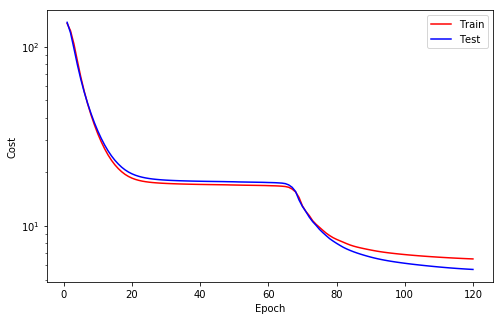


Epoch   121
Train_cost  = 6.5096 | Test_cost  = 5.6833 | 

Epoch   122
Train_cost  = 6.4990 | Test_cost  = 5.6707 | 

Epoch   123
Train_cost  = 6.4889 | Test_cost  = 5.6583 | 

Epoch   124
Train_cost  = 6.4793 | Test_cost  = 5.6459 | 

Epoch   125
Train_cost  = 6.4701 | Test_cost  = 5.6329 | 

Epoch   126
Train_cost  = 6.4611 | Test_cost  = 5.6191 | 

Epoch   127
Train_cost  = 6.4522 | Test_cost  = 5.6043 | 

Epoch   128
Train_cost  = 6.4431 | Test_cost  = 5.5883 | 

Epoch   129
Train_cost  = 6.4338 | Test_cost  = 5.5715 | 

Epoch   130
Train_cost  = 6.4241 | Test_cost  = 5.5546 | 

Epoch   131
Train_cost  = 6.4140 | Test_cost  = 5.5384 | 

Epoch   132
Train_cost  = 6.4038 | Test_cost  = 5.5237 | 

Epoch   133
Train_cost  = 6.3937 | Test_cost  = 5.5112 | 

Epoch   134
Train_cost  = 6.3840 | Test_cost  = 5.5014 | 

Epoch   135
Train_cost  = 6.3751 | Test_cost  = 5.4940 | 

Epoch   136
Train_cost  = 6.3669 | Test_cost  = 5.4887 | 

Epoch   137
Train_cost  = 6.3591 | Test_cost  = 5.4842 

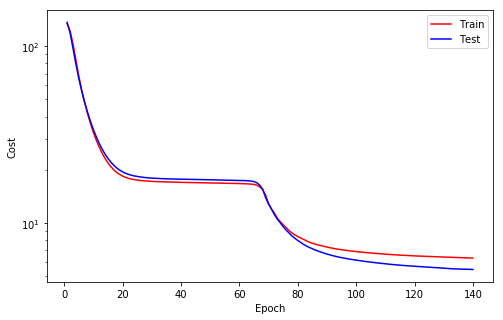


Epoch   141
Train_cost  = 6.3257 | Test_cost  = 5.4555 | 

Epoch   142
Train_cost  = 6.3167 | Test_cost  = 5.4446 | 

Epoch   143
Train_cost  = 6.3080 | Test_cost  = 5.4334 | 

Epoch   144
Train_cost  = 6.3001 | Test_cost  = 5.4226 | 

Epoch   145
Train_cost  = 6.2930 | Test_cost  = 5.4123 | 

Epoch   146
Train_cost  = 6.2867 | Test_cost  = 5.4028 | 

Epoch   147
Train_cost  = 6.2810 | Test_cost  = 5.3939 | 

Epoch   148
Train_cost  = 6.2757 | Test_cost  = 5.3857 | 

Epoch   149
Train_cost  = 6.2706 | Test_cost  = 5.3783 | 

Epoch   150
Train_cost  = 6.2656 | Test_cost  = 5.3715 | 

Epoch   151
Train_cost  = 6.2606 | Test_cost  = 5.3654 | 

Epoch   152
Train_cost  = 6.2556 | Test_cost  = 5.3602 | 

Epoch   153
Train_cost  = 6.2505 | Test_cost  = 5.3558 | 

Epoch   154
Train_cost  = 6.2453 | Test_cost  = 5.3527 | 

Epoch   155
Train_cost  = 6.2401 | Test_cost  = 5.3509 | 

Epoch   156
Train_cost  = 6.2347 | Test_cost  = 5.3503 | 

Epoch   157
Train_cost  = 6.2290 | Test_cost  = 5.3503 

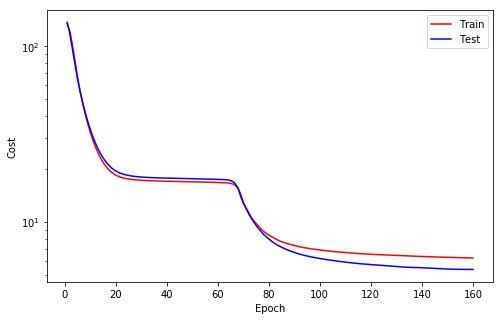


Epoch   161
Train_cost  = 6.2006 | Test_cost  = 5.3376 | 

Epoch   162
Train_cost  = 6.1920 | Test_cost  = 5.3292 | 

Epoch   163
Train_cost  = 6.1836 | Test_cost  = 5.3198 | 

Epoch   164
Train_cost  = 6.1757 | Test_cost  = 5.3103 | 

Epoch   165
Train_cost  = 6.1686 | Test_cost  = 5.3013 | 

Epoch   166
Train_cost  = 6.1624 | Test_cost  = 5.2929 | 

Epoch   167
Train_cost  = 6.1571 | Test_cost  = 5.2853 | 

Epoch   168
Train_cost  = 6.1524 | Test_cost  = 5.2785 | 

Epoch   169
Train_cost  = 6.1481 | Test_cost  = 5.2725 | 

Epoch   170
Train_cost  = 6.1442 | Test_cost  = 5.2674 | 

Epoch   171
Train_cost  = 6.1403 | Test_cost  = 5.2633 | 

Epoch   172
Train_cost  = 6.1363 | Test_cost  = 5.2604 | 

Epoch   173
Train_cost  = 6.1321 | Test_cost  = 5.2589 | 

Epoch   174
Train_cost  = 6.1278 | Test_cost  = 5.2590 | 
==> EarlyStop patience =  1 | Best test_cost: 5.2589

Epoch   175
Train_cost  = 6.1234 | Test_cost  = 5.2605 | 
==> EarlyStop patience =  2 | Best test_cost: 5.2589

Epoch   

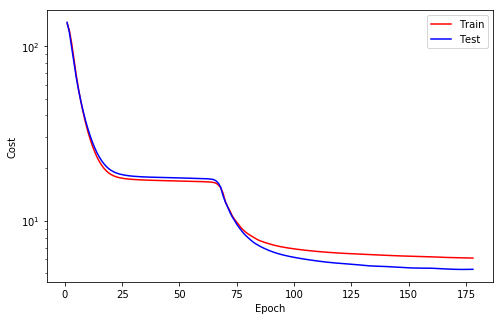

In [11]:
while True:    
    ## Training ##
    model.train()
    cost = 0
    for inputs, targets in trainloader:
        inputs, targets = inputs.to(device), targets.to(device)

        output, hidden = model(inputs, None)
        loss = criterion(output, targets)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

        hidden[0].detach_()
        hidden[1].detach_()        

        cost += loss.item() * inputs.shape[0]
    train_cost = cost / len(train_set)
    
    ## Testing ##
    with torch.no_grad():
        model.eval()
        cost = 0
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)

            output, hidden = model(inputs, None)
            loss = criterion(output, targets)

            cost += loss.item() * inputs.shape[0]
        test_cost = cost / len(test_set)

    ## Callback ##
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()        
        break

# Load Best Model

In [12]:
weights = torch.load("model/lstm/weights_best.pth", map_location="cpu")
model.load_state_dict(weights)

<All keys matched successfully>

# Forecast

In [13]:
from luwiji.rnn import illustration

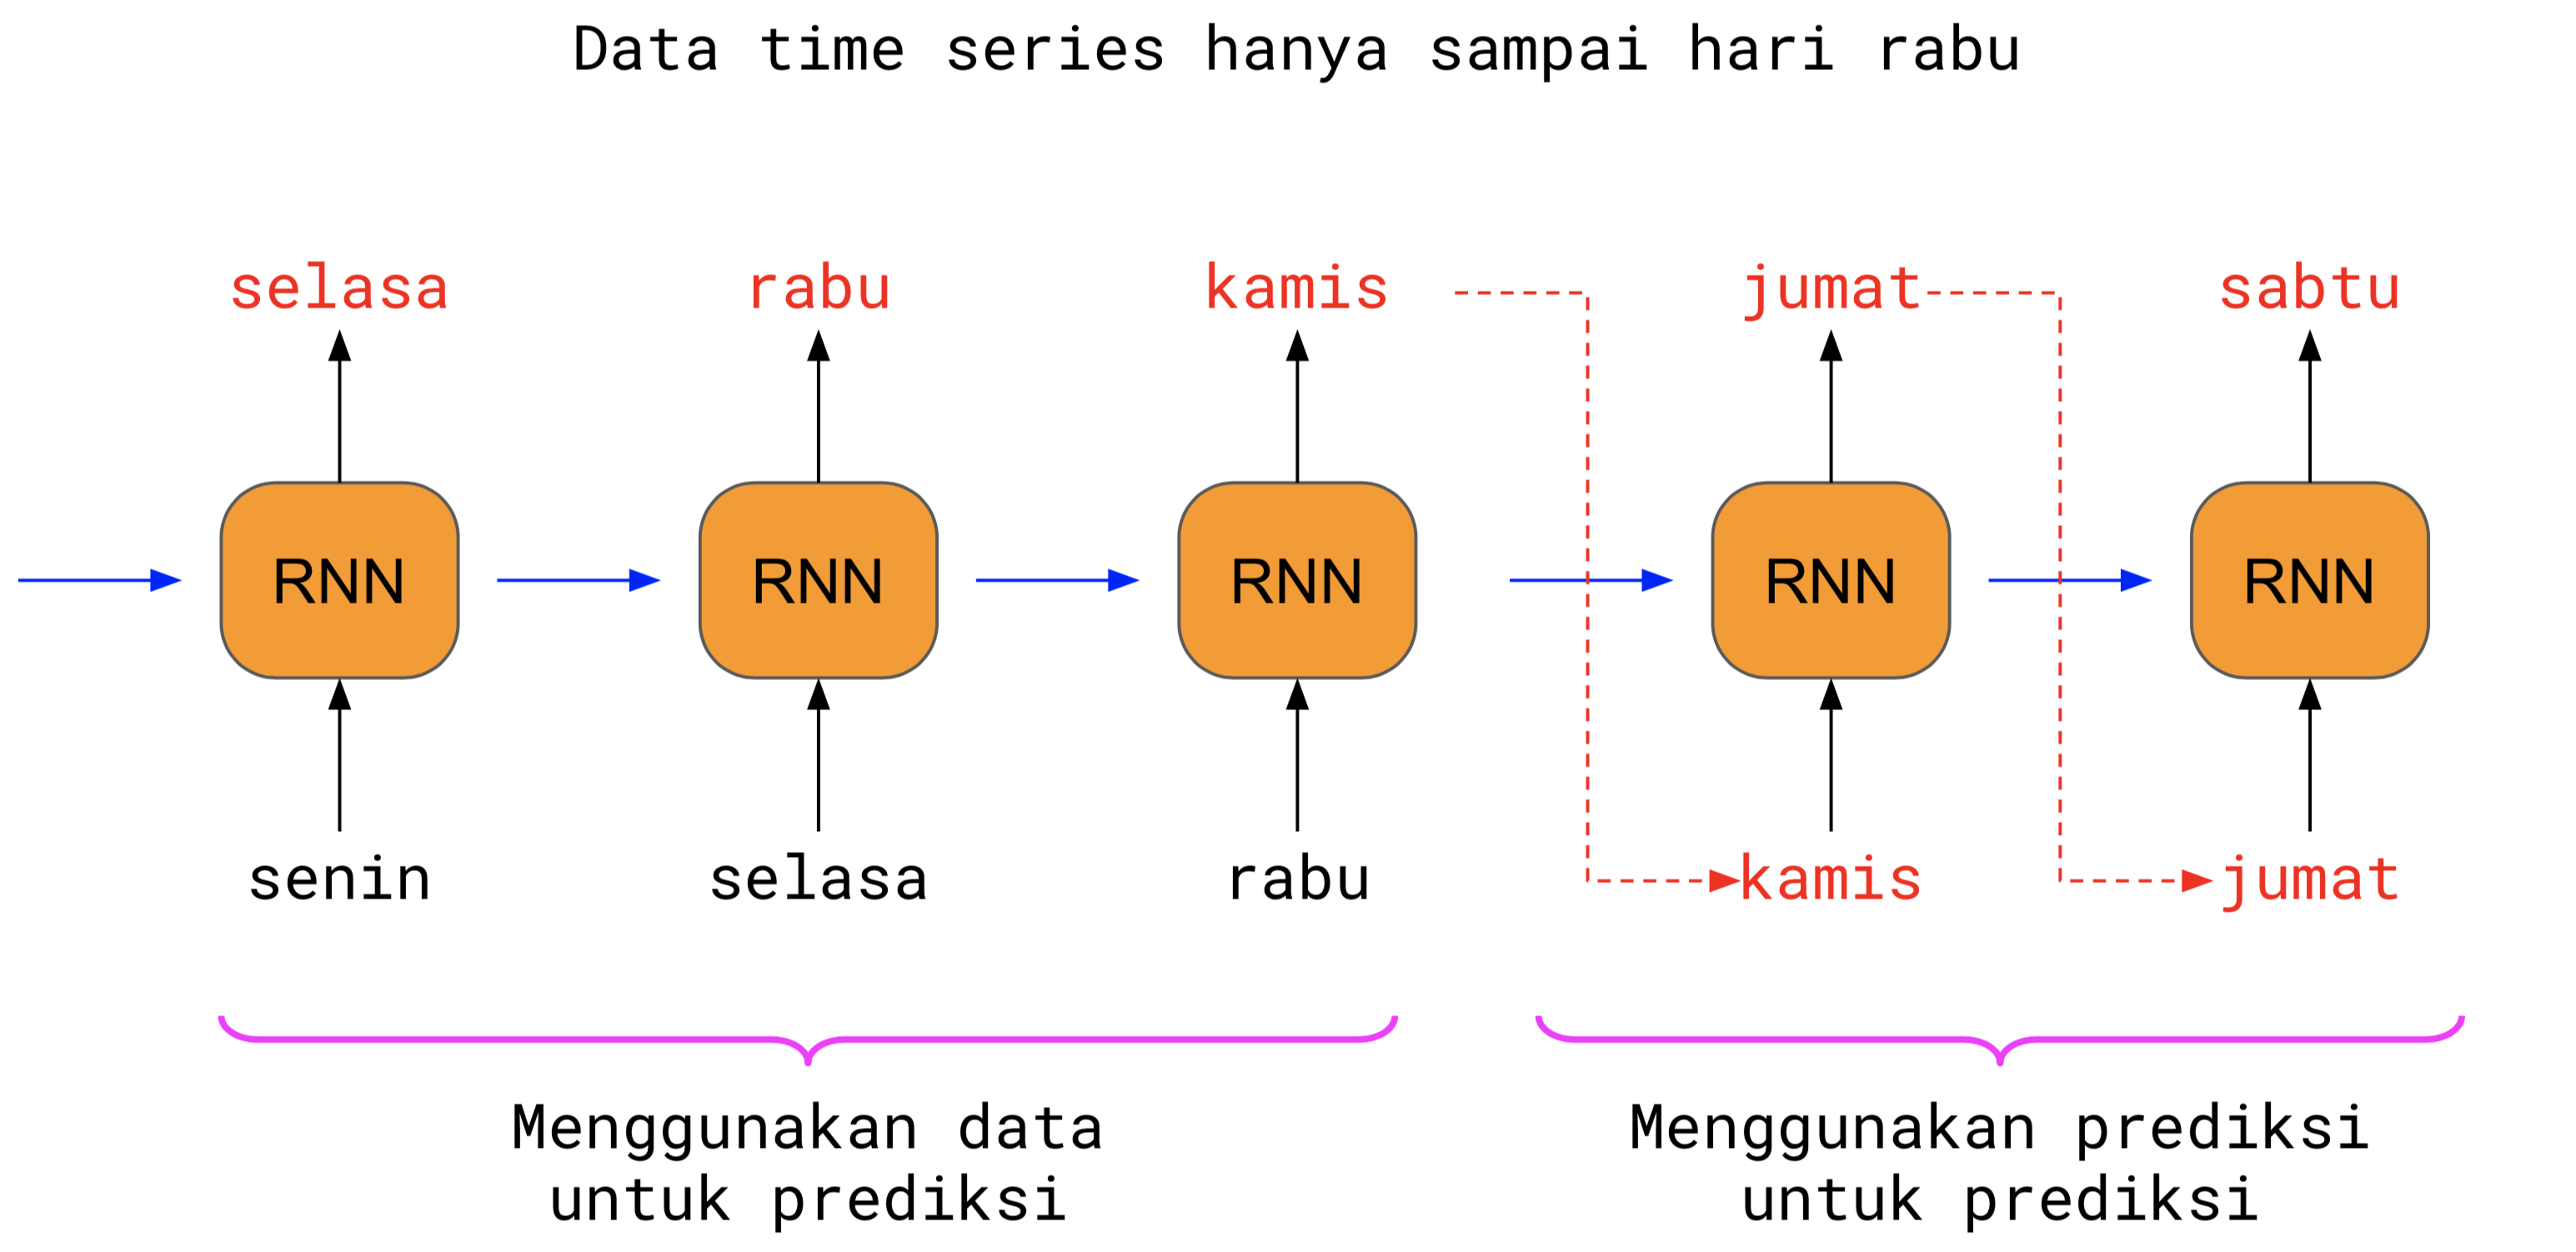

In [14]:
illustration.forecast

In [15]:
from utils import data4pred, pred4pred

In [16]:
train_forecast_set = TimeSeriesDataset(ts_train, "Temp", 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, "Temp", 1)
testforecastloader = DataLoader(test_forecast_set)

(N, S, F): (2919, 1, 1)
Note: last 0 data excluded

(N, S, F): (729, 1, 1)
Note: last 0 data excluded



Text(0.5, 1.0, 'Test')

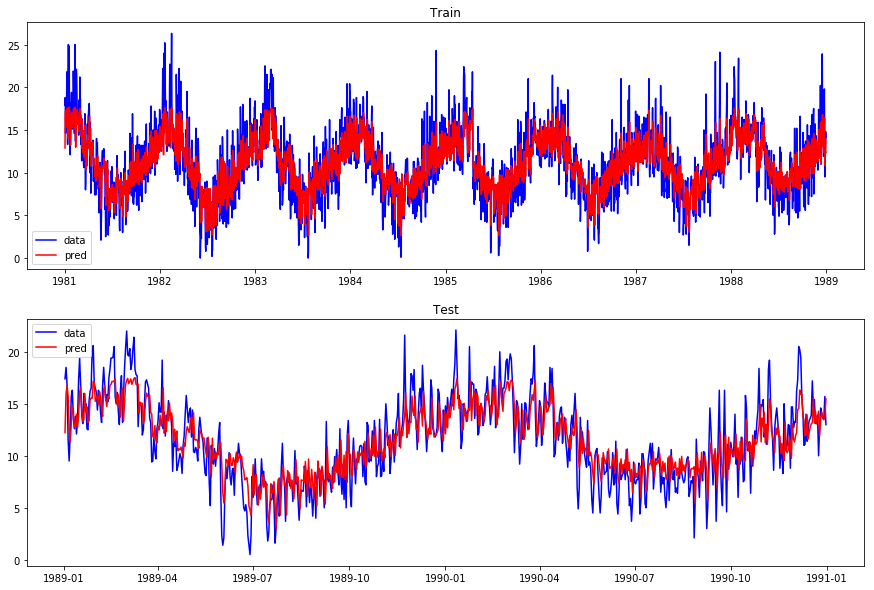

In [17]:
plt.figure(figsize=(15, 10))
    
plt.subplot(211)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(212)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

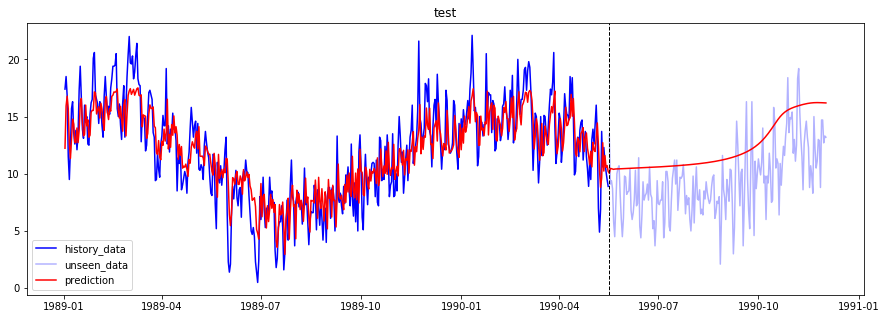

In [18]:
plt.figure(figsize=(15, 5))
pred4pred(model, test_forecast_set, testforecastloader, device)
plt.title("test");